In [1]:
from util.crossvalidation import cross_test_subject, extract_all_mfcc_features
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [2]:
data = extract_all_mfcc_features()

In [37]:
def test_clf(target_data, other_data, p):
    label = [1]*len(target_data) + [0]*len(other_data)
    data = target_data + other_data
    data = np.array(data)
    label = np.array(label)
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.35, stratify=label)

    model = Sequential([
    Dense(3600, activation="relu", name="layer1"),
    Dense(1024, activation="relu", name="layer2"),
    Dense(512, activation="relu", name="layer3"),
    Dense(64, activation="relu", name="layer4"),
    Dense(32, activation="relu", name="layer5"),
    Dense(1, activation='sigmoid'),
    ])

    model.compile(
    'adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_accuracy'],
    )

    model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0
    )

    model.evaluate(X_test, y_test)
    
    y_p = model.predict(X_test)
    y_pred = [1 if y>0.85 else 0 for y in y_p]

    accuracy = sum(y_pred == y_test)/len(y_pred)

    mtx = metrics.confusion_matrix(y_test, y_pred)

    return accuracy, mtx, 






        
        

In [40]:
clf_data = {'score': [], 'sensitivity': [], 'specificity': []}
c_mtx = np.array([[0,  0],[ 0,  0]])
for X in range(1, 25):
    c = []
    target_data, negative_sets = cross_test_subject(data, X, 5, 100)
    for set in negative_sets:
        s, mtx= test_clf(target_data, set, X)
        c_mtx += mtx
        c.append(s)
    clf_data['score'].append(c)



2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - binary_accuracy: 1.0000


In [41]:
tn, fp, fn, tp = c_mtx.ravel()

print(f"True Negatives:  {tn}")
print(f"True Positives:  {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")

fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

youden = sensitivity + specificity - 1

accuracy = (tp+tn)/(tp+tn+fp+fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print()
print(f"False Positive Rate: {fpr}")
print(f"False Negative Rate: {fnr}")
print(f"Sensitivity        : {sensitivity}")
print(f"Specificity        : {specificity}")
print(f"Youden Index       : {youden}")
print(f"Accuracy           : {accuracy}")
print(f"Precision          : {precision}")
print(f"Recall             : {recall}")
print(f"F1-Score           : {F1}")



True Negatives:  4198
True Positives:  468
False Negatives: 22
False Positives: 22

False Positive Rate: 0.005213270142180095
False Negative Rate: 0.044897959183673466
Sensitivity        : 0.9551020408163265
Specificity        : 0.9947867298578199
Youden Index       : 0.9498887706741463
Accuracy           : 0.9906581740976645
Precision          : 0.9551020408163265
Recall             : 0.9551020408163265
F1-Score           : 0.9551020408163265


In [6]:
print(f"Score: {np.mean(clf_data['score'])}")
print(f"Sensitivity: {np.mean(clf_data['sensitivity'])}")
print(f"Specificity: {np.mean(clf_data['specificity'])}")

Score: 0.9736939102564103
Sensitivity: 0.8941666666666667
Specificity: 0.9830720899470899


In [34]:
y = []
y_sen = []
y_spec = []
er = []
er_sen = []
er_spec = []
for cl in clf_data['score']:
    y.append(np.mean(cl))
    er.append(np.std(cl))
# for cl in clf_data['sensitivity']:
#     y_sen.append(np.mean(cl))
#     er_sen.append(np.std(cl))
# for cl in clf_data['specificity']:
#     y_spec.append(np.mean(cl))
#     er_spec.append(np.std(cl))

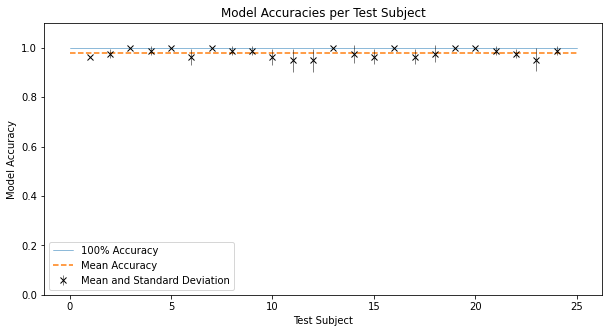

In [35]:
plt.figure(figsize=(10, 5))
plt.title("Model Accuracies per Test Subject")
plt.plot([0,25], [1, 1], "-", linewidth=0.5, label="100% Accuracy")
plt.plot([0,25], [np.mean(clf_data['score']), np.mean(clf_data['score'])], "--", label="Mean Accuracy")
plt.errorbar((list(range(1,25))), y, yerr=er, fmt='x', c="black", elinewidth=0.5, label="Mean and Standard Deviation")
plt.xlabel("Test Subject")
plt.ylabel("Model Accuracy")
plt.ylim(0, 1.1)
plt.legend()
#plt.savefig('accuracy_error_plot.png', dpi=300)



(0.5, 1.1)

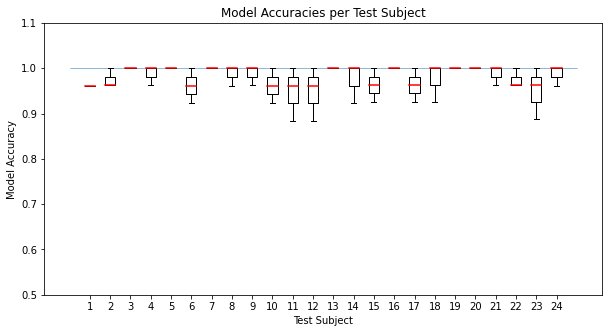

In [36]:
plt.figure(figsize=(10, 5))

plt.plot([0,25], [1, 1], "-", linewidth=0.5, label="100% Accuracy")
plt.title("Model Accuracies per Test Subject")
plt.xlabel("Test Subject")
plt.ylabel("Model Accuracy")
plt.boxplot(np.array(clf_data['score']).T, medianprops=dict(linewidth=1.5, color='red'))
plt.ylim(0.5, 1.1)
#plt.savefig('accuracy_box_plot.png', dpi=300)

<BarContainer object of 24 artists>

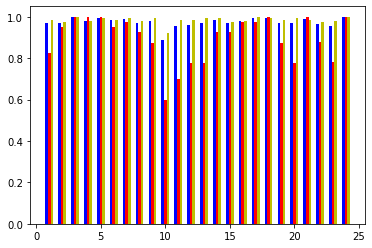

In [10]:
ax = plt.subplot(111)

x = np.array(list(range(1,25)))
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, y_sen, width=0.2, color='r', align='center')
ax.bar(x+.2, y_spec, width=0.2, color='y', align='center')

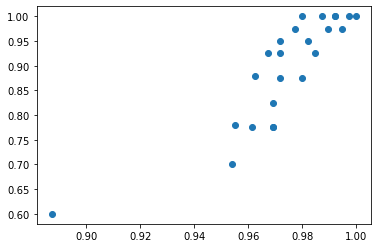

In [11]:
plt.scatter(y, y_sen)

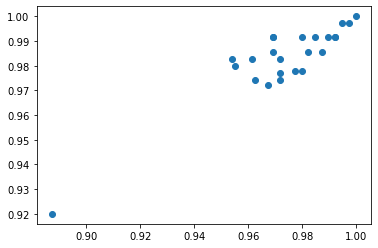

In [12]:
plt.scatter(y, y_spec)